# Oil Price Data with Python
## Brian Dew, brianwdew@gmail.com

## Introduction
This example shows how Python can be used to take a look at oil prices.

## Gathering data

In [185]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
# Import front month contracts for west Texas intermediate crude oil
url = "https://www.quandl.com/api/v3/datasets/CHRIS/CME_CL1.csv"
wticl1 = pd.read_csv(url)
wticl1 = wticl1[['Date','Last']]

In [187]:
wticl1.head(1)

,Date,Last
0,2016-04-08,39.66


In [188]:
import time
today = time.strftime("%Y-%m-%d")
today = str(today)
print "today's date is: " + today

today's date is: 2016-04-08


Since there is some lag in the free Quandl data, we can scrape the latest value of oil from Bloomberg.

In [189]:
import urllib
import re

htmlfile = urllib.urlopen("http://www.bloomberg.com/quote/CL1:COM")
htmltext = htmlfile.read()
regex = '<div class="price">(.+?)</div>'
pattern = re.compile(regex)
price = re.findall(pattern,htmltext)
print "The current price of oil is", price[0]

The current price of oil is 39.72


In [193]:
wtibbdf = pd.DataFrame(np.array([[today, price[0]]]), columns=['Date', 'Last'])
df = wtibbdf.append(wticl1, ignore_index=True)
df = df.set_index('Date')
df.sort_index(inplace=True)
df = df.reset_index().drop_duplicates(subset='Date').set_index('Date')
df.Last = df.Last.astype(float)
df.index = pd.to_datetime(df.index)

## Line plot of oil price

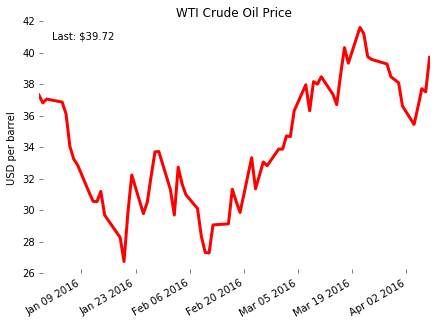

In [215]:
fig = plt.figure(figsize=[7,5])
ax1 = plt.subplot(111)
line = df.Last.tail(70).plot(color='red',linewidth=3)
ax1.set_ylabel('USD per barrel')
ax1.set_xlabel('')
ax1.set_title('WTI Crude Oil Price')
ax1.set_frame_on(False)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
fig.text(0.15, 0.85,'Last: $' + price[0]);
plt.savefig('oil.png', dpi=1000)